#### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read the data

In [2]:
gamma_data = pd.read_csv("gamma_data.csv")

#### Print the head and tail of the data

In [3]:
gamma_data.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,48.2468,17.3565,3.0332,0.2529,0.1515,8.5730,38.0957,10.5868,4.7920,219.0870,1
1,18.8562,16.4600,2.4385,0.5282,0.2933,25.1269,-6.5401,-16.9327,11.4610,162.8480,1
2,60.4580,33.1061,3.1944,0.4679,0.2464,14.3000,-33.8765,28.8315,8.2920,372.5680,1
3,29.4741,22.4581,2.6258,0.3077,0.1740,18.1242,22.7035,13.1673,48.0364,214.1260,1
4,20.3836,9.0462,2.3365,0.6359,0.3894,22.2700,12.9487,-2.0403,43.0032,66.1667,1


In [4]:
gamma_data.tail()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
3799,207.2530,75.8327,4.1476,0.0739,0.0371,-242.4960,-180.0290,-57.8600,74.5740,259.3160,0
3800,172.2442,20.1926,2.9009,0.2887,0.1940,124.5990,112.9452,-21.4436,28.9553,210.8496,0
3801,32.4902,10.6723,2.4742,0.4664,0.2735,-27.0097,-21.1687,8.4813,69.1730,120.6680,0
3802,43.2980,17.3545,2.8307,0.2877,0.1646,-60.1842,-33.8513,-3.6545,78.4099,224.8299,0
3803,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,0


#### Check the structure and summary of the data

In [5]:
gamma_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3804 entries, 0 to 3803
Data columns (total 11 columns):
fLength     3804 non-null float64
fWidth      3804 non-null float64
fSize       3804 non-null float64
fConc       3804 non-null float64
fConc1      3804 non-null float64
fAsym       3804 non-null float64
fM3Long     3804 non-null float64
fM3Trans    3804 non-null float64
fAlpha      3804 non-null float64
fDist       3804 non-null float64
class       3804 non-null int64
dtypes: float64(10), int64(1)
memory usage: 327.0 KB


In [6]:
gamma_data.describe()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
count,3804.000000,3804.000000,3804.000000,3804.000000,3804.000000,3804.000000,3804.000000,3804.000000,3804.000000,3804.000000,3804.000000
mean,52.663971,21.833206,2.813422,0.385432,0.217479,-3.277642,10.605906,0.063088,27.402042,192.189697,0.655363
std,42.555049,18.349049,0.463300,0.183156,0.110928,59.137413,50.563684,20.938464,25.940801,74.765355,0.475312
min,8.051800,0.000000,1.997800,0.013900,0.000800,-457.916100,-331.780000,-149.551300,0.000000,1.282600,0.000000
25%,24.278900,11.741775,2.477800,0.242575,0.131500,-19.214800,-11.550400,-10.860925,5.654650,140.289000,0.000000
50%,36.639650,16.848750,2.730550,0.360950,0.199450,4.528200,15.454950,0.000000,17.664600,191.561000,1.000000
75%,67.654600,24.183450,3.087375,0.506725,0.289500,24.610425,35.441950,10.708000,45.188625,237.785375,1.000000
max,305.422000,201.364000,4.994600,0.875700,0.628300,473.065400,203.863000,139.236100,90.000000,466.407800,1.000000


#### Splitting the data

In [7]:
X, y = gamma_data.iloc[:,:-1],gamma_data.iloc[:,-1]

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [10]:
names = X_train.columns

#### Standardize the train and test data

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()

In [13]:
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.fit_transform(X_test)

In [14]:
X_train = pd.DataFrame(X_train_sc, columns=names)
X_test = pd.DataFrame(X_test_sc, columns=names)

In [15]:
X_train.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
0,0.092757,0.315865,1.007723,-1.283362,-1.270526,0.311122,0.523511,-0.364927,-0.691144,0.370005
1,-0.707474,-0.458052,-0.677818,1.069076,1.221253,0.361636,0.177898,0.401110,1.083127,-1.181395
2,-0.368228,0.221138,0.663996,-0.952908,-0.871375,0.288075,0.191600,0.697049,0.224561,-0.653728
3,-0.486901,-0.394596,-0.633838,-0.005716,-0.173533,-0.579716,0.099022,-0.357433,-0.336787,0.627393
4,0.747383,0.410110,0.518179,-0.638268,-0.808587,0.281185,1.342921,0.716200,0.102013,0.179761


#### Model building

In [16]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [17]:
xg_cl = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [18]:
xg_cl.fit(X_train,y_train)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=10,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [19]:
preds = xg_cl.predict(X_test)

C:\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [20]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [21]:
print(confusion_matrix(y_test, preds))
print("\n")
print(classification_report(y_test, preds))
print("Accuracy = "+ str(accuracy_score(y_test, preds)))

[[201 211]
 [ 16 714]]


             precision    recall  f1-score   support

          0       0.93      0.49      0.64       412
          1       0.77      0.98      0.86       730

avg / total       0.83      0.80      0.78      1142

Accuracy = 0.8012259194395797


#### Build an XGBoost Model with parameters

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
cv_params = {'max_depth': [3,5,7], 'min_child_weight': [1,3,5]}
ind_params = {'learning_rate': 0.1, 'n_estimators': 1000, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic'}
optimized_GBM = GridSearchCV(xgb.XGBClassifier(**ind_params), 
                            cv_params, 
                             scoring = 'accuracy', cv = 5, n_jobs = -1)

In [25]:
optimized_GBM.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, silent=True,
       subsample=0.8),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [31]:
optimized_GBM.grid_scores_

C:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.86138, std: 0.00701, params: {'max_depth': 3, 'min_child_weight': 1},
 mean: 0.86401, std: 0.00931, params: {'max_depth': 3, 'min_child_weight': 3},
 mean: 0.86101, std: 0.00914, params: {'max_depth': 3, 'min_child_weight': 5},
 mean: 0.86927, std: 0.00858, params: {'max_depth': 5, 'min_child_weight': 1},
 mean: 0.86890, std: 0.00863, params: {'max_depth': 5, 'min_child_weight': 3},
 mean: 0.86852, std: 0.00960, params: {'max_depth': 5, 'min_child_weight': 5},
 mean: 0.86702, std: 0.00775, params: {'max_depth': 7, 'min_child_weight': 1},
 mean: 0.86289, std: 0.00653, params: {'max_depth': 7, 'min_child_weight': 3},
 mean: 0.86439, std: 0.00545, params: {'max_depth': 7, 'min_child_weight': 5}]

#### reducing learning rate

In [32]:
cv_params = {'learning_rate': [0.1, 0.01], 'subsample': [0.7,0.8,0.9]}
ind_params = {'n_estimators': 1000, 'seed':0, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic', 'max_depth': 3, 'min_child_weight': 1}


optimized_GBM = GridSearchCV(xgb.XGBClassifier(**ind_params), 
                            cv_params, 
                             scoring = 'accuracy', cv = 5, n_jobs = -1)
optimized_GBM.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, silent=True,
       subsample=1),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'learning_rate': [0.1, 0.01], 'subsample': [0.7, 0.8, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [33]:
optimized_GBM.grid_scores_

C:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.86063, std: 0.00613, params: {'learning_rate': 0.1, 'subsample': 0.7},
 mean: 0.86138, std: 0.00701, params: {'learning_rate': 0.1, 'subsample': 0.8},
 mean: 0.86138, std: 0.00634, params: {'learning_rate': 0.1, 'subsample': 0.9},
 mean: 0.86777, std: 0.00903, params: {'learning_rate': 0.01, 'subsample': 0.7},
 mean: 0.86401, std: 0.00678, params: {'learning_rate': 0.01, 'subsample': 0.8},
 mean: 0.86476, std: 0.00663, params: {'learning_rate': 0.01, 'subsample': 0.9}]

#### Early stopping CV

In [34]:
xgdmat = xgb.DMatrix(X_train, y_train)

In [35]:
our_params = {'eta': 0.1, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic', 'max_depth':3, 'min_child_weight':1} 
# Grid Search CV optimized settings

cv_xgb = xgb.cv(params = our_params, dtrain = xgdmat, num_boost_round = 3000, nfold = 5,
                metrics = ['error'], # Make sure you enter metrics inside a list or you may encounter issues!
                early_stopping_rounds = 100) # Look for early stopping that minimizes error

In [36]:
cv_xgb.tail(5)

,train-error-mean,train-error-std,test-error-mean,test-error-std
124,0.078607,0.003993,0.132984,0.008451
125,0.078043,0.003456,0.131482,0.008251
126,0.077010,0.003502,0.132233,0.009111
127,0.077104,0.003641,0.132233,0.009111
128,0.076352,0.003273,0.130355,0.008644


In [37]:
our_params = {'eta': 0.1, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic', 'max_depth':3, 'min_child_weight':1} 

final_gb = xgb.train(our_params, xgdmat, num_boost_round = 128)

#### feature importance

In [38]:
%matplotlib inline
import seaborn as sns
sns.set(font_scale = 1.5)

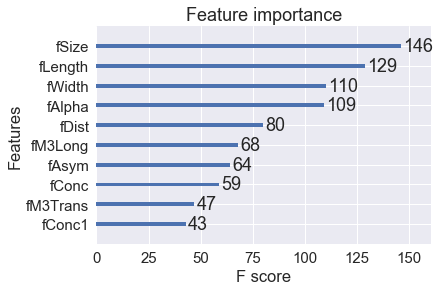

In [39]:
xgb.plot_importance(final_gb)

#### feature importance manually

In [40]:
importances = final_gb.get_fscore()
importances

{'fAlpha': 109,
 'fM3Long': 68,
 'fSize': 146,
 'fDist': 80,
 'fLength': 129,
 'fConc': 59,
 'fWidth': 110,
 'fAsym': 64,
 'fConc1': 43,
 'fM3Trans': 47}

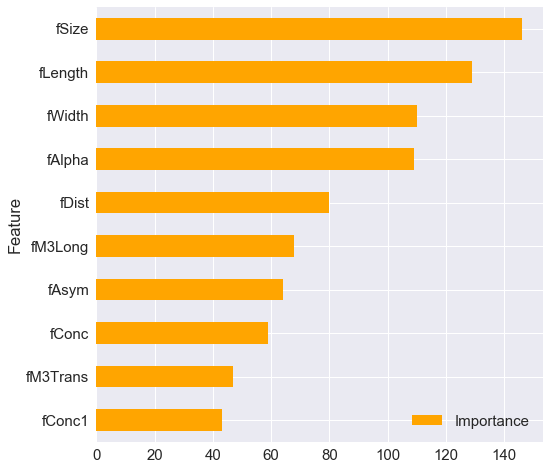

In [41]:
importance_frame = pd.DataFrame({'Importance': list(importances.values()), 'Feature': list(importances.keys())})
importance_frame.sort_values(by = 'Importance', inplace = True)
importance_frame.plot(kind = 'barh', x = 'Feature', figsize = (8,8), color = 'orange')

In [42]:
testdmat = xgb.DMatrix(X_test)

In [43]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = final_gb.predict(testdmat) # Predict using our testdmat
y_pred

array([0.91038305, 0.833077  , 0.59169894, ..., 0.6734337 , 0.56680346,
       0.5108075 ], dtype=float32)

#### Converting probabilities to class

In [46]:
np.rint(y_pred)
y_pred

array([1., 1., 1., ..., 1., 1., 1.], dtype=float32)

In [47]:
accuracy_score(y_pred, y_test), 1-accuracy_score(y_pred, y_test)

(0.8651488616462347, 0.13485113835376528)

In [49]:
print(classification_report(y_pred, y_test))

             precision    recall  f1-score   support

        0.0       0.75      0.85      0.80       364
        1.0       0.93      0.87      0.90       778

avg / total       0.87      0.87      0.87      1142

